In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 5,5

In [2]:
dt = 0.01
t  = np.arange(0,1+dt, dt)

(-1.5, 1.5, -1.5, 1.5)

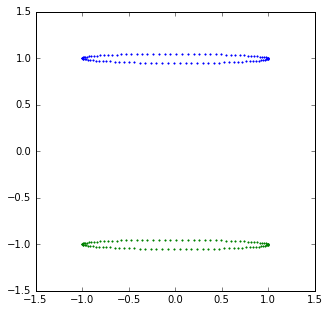

In [12]:
x0 = np.cos(2*np.pi*t)
y0 = np.sin(2*np.pi*t)
z0 = 0*t + 1

plt.plot(x0 + 0.05*y0, z0 - 0.05*y0, '.', markersize=3)

x1 = np.cos(2*np.pi*t)
y1 = np.sin(2*np.pi*t)
z1 = 0*t - 1

plt.plot(x1 + 0.05*y1, z1 - 0.05*y1, '.', markersize=3)

plt.axis("Equal")

(-1.5, 1.5, -1.5, 1.5)

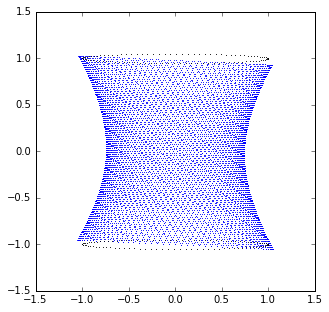

In [22]:
t = np.arange(0,1,0.01)

for theta0 in np.arange(0,1,0.01):
    #for theta1 in np.arange(0,1,0.05):
    theta1 = theta0 + 0.25
    
    x0 = np.cos(2*np.pi*theta0)
    x1 = np.cos(2*np.pi*theta1)
        
    x = x0*t + x1*(1-t)
        
    y0 = np.cos(2*np.pi*theta0)
    y1 = np.cos(2*np.pi*theta1)
        
    y = y0*t + y1*(1-t)
        
    z0 = +1
    z1 = -1
        
    z = z0*t + z1*(1-t)
        
    plt.plot(x + 0.05*y, z - 0.05*y, '.', color = 'blue', markersize=1)

t = np.arange(0,1,0.01)
        
x = np.cos(2*np.pi*t)
y = np.sin(2*np.pi*t) 
z = +1
plt.plot(x + 0.05*y, z - 0.05*y, 'k.', markersize=1)
        
x = np.cos(2*np.pi*t)
y = np.sin(2*np.pi*t) 
z = -1
plt.plot(x + 0.05*y, z - 0.05*y, 'k.', markersize=1)

plt.axis("Equal")

# Diophantine Approximation on a Circle

Can we find all the rational points on a circle?  $x^2 + y^2 = 1$ with $x, y \in \mathbb{Q}$.  We think if $x = \frac{a}{c}, y = \frac{b}{c}$ (with $a,b,c \in \mathbb{Z}$) then:

$$ [ (a/c)^2 + (a/c)^2 = 1 ] \text{ or } [a^2 + b^2 = c^2 ] $$

Then we can solve this system of equations (with $m,n \in \mathbb{Z}$)

$$ a = m^2 - n^2 \; b = 2mn \; c = m^2 + n^2  $$

So we have lots of rational points on the circle and we can find all of them.  And there is a nice $SL(2,\mathbb{Z})$ (or possibly $\Gamma(2)$) action on these points.

In [27]:
m = 1 + np.arange(100)
n = 1 + np.arange(100)

a =   m[None,...]**2 - n[...,None]**2
b = 2*m[None,...]*n[...,None]
c =   m[None,...]**2 + n[...,None]**2

a**2 + b**2 - c**2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

How close can we get to the pair $(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} ) \in S^1$ ? On the circle $\cos^2 \theta + \sin^2 \theta = 1$.  Here $\theta = 45^\circ$.

In [29]:
dist = (a*1.0/c - 1/np.sqrt(2))**2 + (b*1.0/c - 1/np.sqrt(2))**2

x,y = np.where(dist < 0.01)

np.vstack([x,y])

array([[ 1,  2,  2, ..., 45, 45, 46],
       [ 4,  6,  7, ..., 98, 99, 99]])

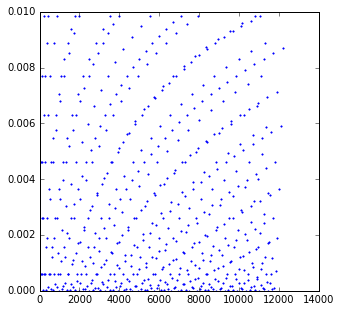

In [32]:
# plot distance against the size of c ?

plt.plot( c[x,y] ,  dist[x,y],'.', markersize=3)

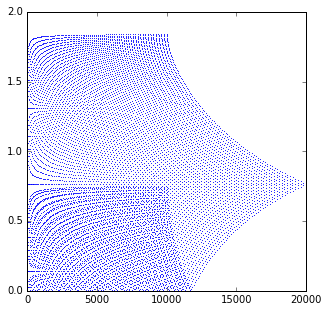

In [36]:
plt.plot( c,  dist**0.5,'b.', markersize=1)
plt.show()